# How many merges?

If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? (To help answer this question, think back to the video, in which Ben walked through an example of hierarchical clustering using 6 countries.)

- 4

# Hierarchical clustering of the grain data

the SciPy `linkage()` function performs hierarchical clustering on an array of samples. Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

In [8]:
import pandas as pd
samples = pd.read_csv("dataset/seeds.csv", header=None)
samples.columns = ["A", "B", "C", "D", "E", "F", "G", "H"]
print(samples.iloc[:,7].value_counts())
samples.head()

1    70
2    70
3    70
Name: H, dtype: int64


,A,B,C,D,E,F,G,H
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


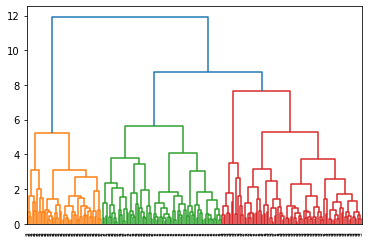

In [13]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage , dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples.drop("H", axis=1).values, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels = samples.iloc[:,7].values,
           leaf_rotation= 90,
           leaf_font_size= 6,
)
plt.show()


# Hierarchies of stocks

you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`

In [14]:
movements = pd.read_csv("dataset/company-stock-movements-2010-2015-incl.csv")
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


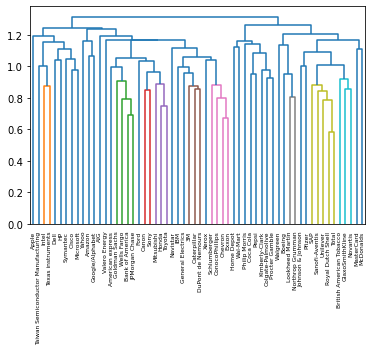

In [16]:

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements.iloc[:,1:].values)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels = movements.iloc[:,0].values, leaf_rotation=90, leaf_font_size=6)
plt.show()


# Which clusters are closest?

you learned that the linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

Consider the three clusters in the diagram. Which of the following statements are true?

<center><img src="images/02.01.png"  style="width: 400px, height: 300px;"/></center>

- In single linkage, Cluster 3 is the closest cluster to Cluster 2.
- In complete linkage, Cluster 1 is the closest cluster to Cluster 2.

# Different linkage, different hierarchical clustering!

you saw a hierarchical clustering of the voting countries at the Eurovision song contest using `'complete'` linkage. Now, perform a hierarchical clustering of the voting countries with `'single'` linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

In [28]:
samples = pd.read_csv("dataset/eurovision-2016.csv")
# print(samples["To country"].value_counts())
samples = samples[samples["From country"]=="Russia"].drop("From country", axis=1)
samples.head()

,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
813,Belgium,22,23,22,4,13,20,22,NaN,NaN
814,Czech Republic,18,22,5,13,14,14,23,NaN,NaN
815,The Netherlands,8,5,24,18,15,12,20,NaN,NaN
816,Azerbaijan,2,2,3,3,1,2,5,10.0,6.0
817,Hungary,12,15,12,19,2,10,12,1.0,NaN


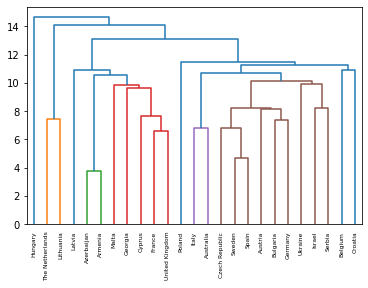

In [29]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage , dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples.loc[:,"Jury A":"Jury E"].values, method='single')

# Plot the dendrogram
dendrogram(mergings, labels= samples.loc[:,"To country"].values, leaf_rotation=90,  leaf_font_size=6)
plt.show()


# Intermediate clusterings

Displayed on the right is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier. If the hierarchical clustering were stopped at height 12 on the dendrogram, how many clusters would there be?

- 4

# Extracting the cluster labels

Now, use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the country names using a cross-tabulation.

In [30]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 12, criterion='distance' )

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': samples.loc[:,"To country"].values})

# Create crosstab: ct
ct = pd.crosstab(df['labels'] , df['varieties'])

# Display ct
print(ct)


varieties  Armenia  Australia  Austria  Azerbaijan  Belgium  Bulgaria  \
labels                                                                  
1                0          0        0           0        0         0   
2                1          0        0           1        0         0   
3                0          1        1           0        1         1   
4                0          0        0           0        0         0   

varieties  Croatia  Cyprus  Czech Republic  France  ...  Latvia  Lithuania  \
labels                                              ...                      
1                0       0               0       0  ...       0          1   
2                0       1               0       1  ...       1          0   
3                1       0               1       0  ...       0          0   
4                0       0               0       0  ...       0          0   

varieties  Malta  Poland  Serbia  Spain  Sweden  The Netherlands  Ukraine  \
labels         

# t-SNE visualization of grain dataset

you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot.

In [32]:
samples = pd.read_csv("dataset/seeds.csv", header=None)
samples.columns = ["A","B","C","D","E","F","G","H"]
samples.head()

,A,B,C,D,E,F,G,H
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


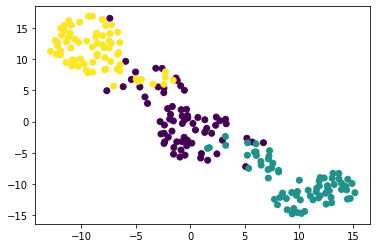

In [34]:

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples.drop("H", axis=1).values)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=samples["H"].values)
plt.show()


# A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array `normalized_movements` (these have already been normalized for you).

In [36]:
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


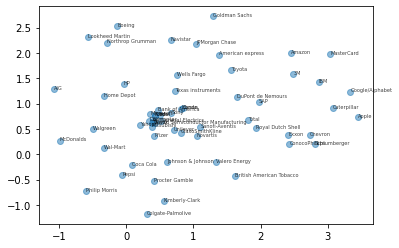

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_movements = scaler.fit_transform(movements.iloc[:,1:])

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs , ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, movements.iloc[:,0]):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
